In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
sdf = pd.DataFrame(columns=['Subject', 'Trail Score'])

In [82]:
sdf['Subject'] = np.loadtxt('/home/kahwang/Trail_making_part_B_LESYMAP/subList_No_Epilepsy')
sdf['Trail Score'] =np.loadtxt('/home/kahwang/Trail_making_part_B_LESYMAP/No_Epilepsy/Data/Score.txt')

In [83]:
masks =['0902' ,1105, 1692, 1809, 1830, 2092, 2105, 2552, 2697, 2781, 3049, 3184]
for mask in masks:#['1809','2781', '2697']:
    cname = "LesionLoad_mask%s" %mask
    fn = '/home/kahwang/Tha_Lesion_Masks/LesionLoad/%s' %cname
    sdf[cname] = np.loadtxt(fn)
    sdf[cname+'_rank'] = sdf[cname].rank()
    #plt.figure()
    #sns.regplot(x=cname, y='Trail Score', data=sdf)

In [84]:
patients = [1105, 1692, 1809, 1830, 2092, 2105, 2552, 2697, 2781, 3049, 3184]

for p in patients:
    sdf=sdf.drop(sdf[sdf['Subject']== p].index)


In [85]:
print(sdf.head())
print(len(sdf))

   Subject  Trail Score  LesionLoad_mask0902  LesionLoad_mask0902_rank  \
0     46.0         78.0             0.010462                     282.0   
1    194.0        136.0             0.007752                     212.0   
2    297.0         78.0             0.000915                     121.0   
3    318.0         61.0             0.013192                     333.0   
4    414.0        141.0             0.014311                     344.0   

   LesionLoad_mask1105  LesionLoad_mask1105_rank  LesionLoad_mask1692  \
0             0.020736                     156.0             0.006798   
1             0.037553                     334.0             0.001240   
2             0.008470                      76.0            -0.007464   
3             0.036878                     328.0             0.000370   
4             0.036949                     329.0             0.022977   

   LesionLoad_mask1692_rank  LesionLoad_mask1809  LesionLoad_mask1809_rank  \
0                     256.0           

In [86]:
a=sdf.loc[sdf['LesionLoad_mask1809_rank']>508]['Subject']
b=sdf.loc[sdf['LesionLoad_mask2781_rank']>508]['Subject']
c=sdf.loc[sdf['LesionLoad_mask2697_rank']>508]['Subject']

print(a)
print(b)
print(c)
print(np.intersect1d(a,b))
print(np.intersect1d(a,c))


71     1587.0
188    2140.0
193    2172.0
312    2941.0
314    2952.0
348    3103.0
365    3165.0
372    3191.0
456    3582.0
483    3654.0
516    3868.0
Name: Subject, dtype: float64
71     1587.0
105    1733.0
188    2140.0
196    2186.0
207    2273.0
314    2952.0
371    3185.0
431    3502.0
483    3654.0
493    3688.0
516    3868.0
Name: Subject, dtype: float64
9       615.0
20      858.0
41     1273.0
80     1645.0
107    1737.0
125    1861.0
126    1863.0
159    2056.0
163    2067.0
164    2070.0
192    2151.0
238    2473.0
255    2566.0
269    2635.0
325    2992.0
353    3124.0
399    3342.0
429    3490.0
451    3575.0
Name: Subject, dtype: float64
[1587. 2140. 2952. 3654. 3868.]
[]


In [88]:
print(sdf.loc[sdf['LesionLoad_mask1809_rank']>508]['Trail Score'].mean())
print(sdf.loc[sdf['LesionLoad_mask2781_rank']>508]['Trail Score'].mean())
print(sdf.loc[sdf['LesionLoad_mask2697_rank']>508]['Trail Score'].mean())
print(sdf.loc[sdf['LesionLoad_mask1809_rank']>508]['Trail Score'].std())
print(sdf.loc[sdf['LesionLoad_mask2781_rank']>508]['Trail Score'].std())
print(sdf.loc[sdf['LesionLoad_mask2697_rank']>508]['Trail Score'].std())

76.63636363636364
87.9090909090909
111.52631578947368
31.257871735845125
37.51387622055216
71.61421989540953


In [72]:
import statsmodels.api as sm

In [75]:
Y = sdf['Trail Score']
X = sm.add_constant(sdf['LesionLoad_sum_mask1809'])
sm.OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Trail Score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.690
Date:                Tue, 02 Jul 2019   Prob (F-statistic):            0.00996
Time:                        20:52:39   Log-Likelihood:                -2971.4
No. Observations:                 528   AIC:                             5947.
Df Residuals:                     526   BIC:                             5955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      96.7126      3.314     29.185      0.000      90.203     103.223
LesionLoad_sum_mask1809     0.0478      0.018      2.587      0.010       0.011       0.084
==============================================================================
Omnibus:                      446.707   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12776.914
Skew:                           3.547   Prob(JB):                         0.00
Kurtosis:                      26.031   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
Y = sdf['Trail Score']
X = sm.add_constant(sdf['LesionLoad_sum_mask2781'])
sm.OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Trail Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.06435
Date:                Tue, 02 Jul 2019   Prob (F-statistic):              0.800
Time:                        20:53:21   Log-Likelihood:                -2974.7
No. Observations:                 528   AIC:                             5953.
Df Residuals:                     526   BIC:                             5962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     100.2781      3.393     29.556      0.000      93.613     106.943
LesionLoad_sum_mask2781     0.0040      0.016      0.254      0.800      -0.027       0.035
==============================================================================
Omnibus:                      444.040   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12216.934
Skew:                           3.531   Prob(JB):                         0.00
Kurtosis:                      25.482   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
Y = sdf['Trail Score']
X = sm.add_constant(sdf['LesionLoad_sum_mask2697'])
sm.OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Trail Score   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     39.64
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           6.43e-10
Time:                        20:53:47   Log-Likelihood:                -2955.5
No. Observations:                 528   AIC:                             5915.
Df Residuals:                     526   BIC:                             5924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      91.7600      3.181     28.848      0.000      85.511      98.009
LesionLoad_sum_mask2697     0.0632      0.010      6.296      0.000       0.043       0.083
==============================================================================
Omnibus:                      429.092   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11255.776
Skew:                           3.365   Prob(JB):                         0.00
Kurtosis:                      24.595   Cond. No.                         354.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
sdf.head()

,Subject,Trail Score,LesionLoad_mask0902,LesionLoad_mask1105,LesionLoad_mask1692,LesionLoad_mask1809,LesionLoad_mask1830,LesionLoad_mask2092,LesionLoad_mask2105,LesionLoad_mask2552,LesionLoad_mask2697,LesionLoad_mask2781,LesionLoad_mask3049,LesionLoad_mask3184
0,46.0,78.0,0.010462,0.020736,0.006798,0.010564,0.027334,0.015956,0.018627,0.024310,0.008714,0.015146,0.014620,0.020325
1,194.0,136.0,0.007752,0.037553,0.001240,0.000367,0.023557,0.005902,0.022549,0.020235,0.021727,0.021160,0.007838,0.013057
2,297.0,78.0,0.000915,0.008470,-0.007464,-0.005768,0.017774,-0.004737,0.010240,0.022892,-0.003791,0.024463,0.008317,-0.004101
3,318.0,61.0,0.013192,0.036878,0.000370,0.005592,0.047426,0.021059,0.028811,0.033667,-0.003374,0.036972,0.014924,0.014518
4,414.0,141.0,0.014311,0.036949,0.022977,0.025567,0.038371,0.028599,0.038749,0.040338,0.001857,0.034814,0.025930,0.027876


In [66]:
print(sdf[sdf['LesionLoad_mask1809']>.1]['Trail Score'].mean())
print(sdf[sdf['LesionLoad_mask1809']>.1]['Trail Score'].std())

95.0909090909091
42.396826639394945


In [65]:
print(sdf[sdf['LesionLoad_mask2781']>.1]['Trail Score'].mean())
print(sdf[sdf['LesionLoad_mask2781']>.1]['Trail Score'].std())

89.25
35.443878435048816


In [64]:
print(sdf[sdf['LesionLoad_mask2697']>.1]['Trail Score'].mean())
print(sdf[sdf['LesionLoad_mask2697']>.1]['Trail Score'].std())

112.34285714285714
65.74960973362674


In [33]:
! 3dTcat -prefix corrmask_3049.nii NKI_ttest_3049.nii.gz[0]

++ 3dTcat: AFNI version=AFNI_18.2.19 (Sep 27 2018) [64-bit]
++ elapsed time = 0.1 s


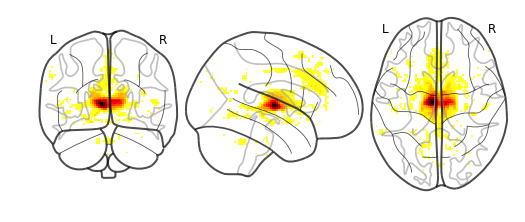

In [34]:
from nilearn import plotting
plotting.plot_glass_brain('corrmask_3049.nii', threshold=.1)

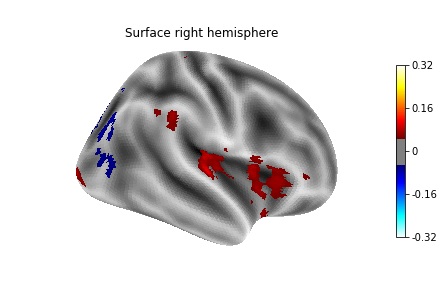

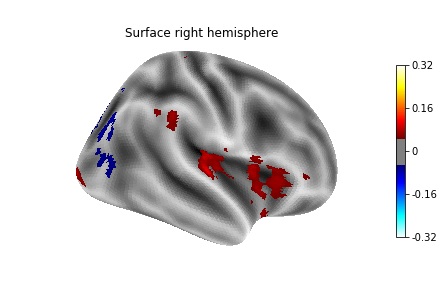

In [38]:
from nilearn import surface
fsaverage = ni.datasets.fetch_surf_fsaverage()
texture = surface.vol_to_surf('corrmask_3049.nii', fsaverage.pial_right)

plotting.plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere', colorbar=True,
                            threshold=.05, bg_map=fsaverage.sulc_right)